# FIRE - Far-ultraviolet Irradiated Rotational Evolution model

## FUV output of massive stars

**Last update (Julia Roquette - 5th August 2021)** 

This notebook contains a description of the implementation of functions for deriving the FUV luminosity of massive stars ($M_*\geq1.8$M$_\odot$), which were used in the paper Roquette et al. 2021. For simulations of spin evolution of low-mass stars around massive stars, see the jupyter-notebook `MassiveStars_PlummerSphere.ipynb`.

### FUV luminosities and fluxes as a function of stellar mass


I used the results in a paper by 
[Parravano et al. 2003](https://ui.adsabs.harvard.edu/abs/2003ApJ...584..797P/abstract) to derive the UV luminosities of massive stars. Luminosities as a function of stellar mass are derived following the tabulations presented in Parravano+2003's Table 1 (see below), which were derived by integrating the stellar flux in the FUV bands using synthetic spectra and Padova models and averaging the values through the MS lifetime of a massive star. 



![](fig/ParravanoTab1_FUVflux.jpg)



The `Parravano` class is initialized while creating an object for the stellar mass and defining the Habing flux, which is the units typically used for measuring the FUV-flux: $G_0=1.6\times10^{-3}\mathrm{erg}\;\mathrm{cm}^{-2}\;\mathrm{s}$ [(Habing 1968)](https://ui.adsabs.harvard.edu/abs/1968BAN....19..421H/abstract)

Usage:

```python
massive_star = Parravano(mass)
```

Class definition: 
```python
class Parravano:
    """
    Based on Parravano et al. (2003) ApJ 584 797 [1], this class provides 
    the tools to estimate the amount of far-ultraviolet radiation outputed
    by massive stars. The scalling relations used here are defined in their
    Table 1 and are available for stars in the mass range 1.8-120Msun
    
    [1] https://ui.adsabs.harvard.edu/abs/2003ApJ...584..797P/abstract
    """
    def __init__(self, mass):
        """
        """
        self.M = float(mass)
        self.G0 = u.def_unit(r'G_0', 1.6e-3 << u.erg/(u.cm**2)/u.s )
```

Next, the `LEUV` function will use the relations in Table 1 to estimate the extreme-UV luminosity. Extreme-UV photons ($h\nu>$13.6eV) are capable of ionizing hydrogen atoms. Even though I am only looking at the influence of FUV in the Roquette+21, the EUV-influence can be important for stars too close to massive stars and I am therefore including it here for future use. The units here are photons.s$^{-1}$.

```python
    def LEUV(self):
        """
        Gives extreme-ultraviolet (h\nu > 13.6eV) luminosities as a function 
        of stellar mass.
        
        ----

        L_EUV has units photons/s
        """
        if self.M >= 5.:
            if self.M < 7.:
                return 2.23*1e34*(self.M**11.5) << u.ph/u.s
            elif self.M < 12:
                return 3.69*1e36*(self.M**8.87) << u.ph/u.s        
            elif self.M < 20:
                return 4.8*1e38*(self.M**7.85) << u.ph/u.s
            elif self.M < 30:
                return 3.12*1e41*(self.M**4.91) << u.ph/u.s
            elif self.M < 40:
                return 2.8*1e44*(self.M**2.91) << u.ph/u.s
            elif self.M < 60:
                return 3.49*1e45*(self.M**2.23) << u.ph/u.s
            elif self.M < 120:
                return 2.39*1e46*(self.M**1.76) << u.ph/u.s
        else:
            return np.nan    
```

Usage:

Once the class is already initialize for a certain `mass`, 

```python
LEUV = massive_star.LEUV()
```

will provide the extreme-UV luminosity. 

Next, Parravano+2003 provides this L$_\mathrm{FUV}-$L$_{H_2}$, which gives the FUV luminosity excluding the $H_2$ band. Here, 
the FUV-band is defined to cover the  6eV$\leq h\nu\leq$13.4eV, or 919-2070$\dot{\mathrm{A}}$, while the H$_2$ band covers 
912-1100$\dot{\mathrm{A}}$.

```python
def LFUV_LH2(self):
        """
        Parravano et al. (2003) gives scalling relations for L_FUV-L_H2, 
        which is basically the FUV band excluding the narrow "H_2 band".
        
        ----
        
        L_FUV-L_H2 has units of Lsun. 
        """
        if self.M >= 1.8:
            if self.M < 2.:
                return 2.77*1e-4*(self.M**11.8) << u.L_sun
            elif self.M < 2.5:
                return 1.88*1e-3*(self.M**9.03) << u.L_sun 
            elif self.M < 3.:
                return 1.19*1e-2*(self.M**7.03) << u.L_sun
            elif self.M < 6.:
                return 1.47*1e-1*(self.M**4.76) << u.L_sun
            elif self.M < 9.:
                return 8.22*1e-1*(self.M**3.78) << u.L_sun
            elif self.M < 12.:
                return 2.29*(self.M**3.31) << u.L_sun
            elif self.M < 30.:
                return 2.7*1e1*(self.M**2.32) << u.L_sun
            elif self.M < 120.:
                return 3.99*1e2*(self.M**1.54) << u.L_sun
        else:
            return np.nan    
```

Usage:

```python
LFUV_H2 = massive_star.LFUV_H2()

```

In order to get the luminosity in the whole FUV-band, we need to include the contribution of the narrow H$_2$ back to it:


```python
    def LH2(self):
        """
        Gives the luminosity in the narrow "H_2 band"
        This covers about 10% of the FUV band in the wavelength range
        912-1100\AA. 
        
        ----
        
        L_H2 has units of Lsun
        """       
        if self.M >= 1.8:
            if self.M < 3:
                return 1.98*1e-14*(self.M**26.6) << u.L_sun
            elif self.M < 4.:
                return 2.86*1e-8*(self.M**13.7) << u.L_sun
            elif self.M < 6.:
                return 1.35*1e-4*(self.M**7.61) << u.L_sun
            elif self.M < 9.:
                return 1.1*1e-2*(self.M**5.13) << u.L_sun
            elif self.M < 12.:
                return 1.07*1e-1*(self.M**4.09) << u.L_sun
            elif self.M < 15.:
                return 5.47*1e-1*(self.M**3.43) << u.L_sun
            elif self.M < 30.:
                return 9.07*(self.M**2.39) << u.L_sun
            elif self.M < 120.:
                return 9.91*1e1*(self.M**1.69) << u.L_sun 
        else:
            return np.nan
```


Finally, this function put the two components together and returns the FUV luminosity. Note that here, the units are in cgs.

```python
def LFUV(self):
        """
        Gives the luminosity in the whole FUV band, which covers 
        6eV<=h\nu<=13.4eV, or 919-2070\AA
        
        ----
        
        L_FUV is given in units erg/s (cgs)
        """               
        return (self.LFUV_LH2() + self.LH2()).cgs
```

Usage:

```python
LFUV = massive_star.LFUV()
```

Finally, these luminosities can now be used to estimate the flux at a certain distance from the massive star. This is done by the `localFux(L, d)` function, which simply estimates $F=\frac{L}{4\pi (d-d_0)^2}$, where $d$ is the distance (in pc) between the massive stars and a reference point. Note that the calculation includes a buffer factor ($d_0$) of $10^{-10}$ parsec to avoid an infinite flux at the origin. 

```python 
    def localFlux(self,L, d):
        """
        Given any luminosity, return the flux at a distance d, in parsec
        """
        if not isinstance(d, type(u.pc)):
            d = d << u.pc
        buffer = 1e-10*u.pc
        return L/4./np.pi/(d-buffer)**2
```

In order to guarantee that the fluxes are returned in the desired units, FUV and EUV fluxes are provided by dedicated functions.

```python
    def localFUV(self, d):
        """
        Return the Local FUV flux at a distance d (in parsec), in G0 units 
        """
        return self.localFlux(self.LFUV(), d).to(self.G0)
``` 

This function returns the local FUV-flux at a distance $d$ form the star in G$_0$ units. 

```python
F_FUV = massive_star.localFUV(distance)
```

Similarly, this function returns the EUV-flux at a distance $d$ form the star in photons.s$^{-1}$.cm$^{-2}$ 

```python
    def localEUV(self, d):
        """
        Return the Local FUV flux at a distance d (in parsec), in  
        photons/s/cm2
        """        
        return self.localFlux(self.LEUV(), 
                              d).decompose(bases=[u.cm, u.ph, u.s])
```

Usage: 

```python
F_EUV = massive_star.localFUV(distance)
```


    

To test the functions, we can look at the properties of the stars MT91-486 in the Cygnus OB2 association. This is an O7.5V star, with estimated mass of 25.4M $_\odot$. The star is in the list of massive stars studied by [Guarcello et al. 2016](https://ui.adsabs.harvard.edu/abs/2016arXiv160501773G/abstract) and has $\log\Big(\frac{L_\mathrm{FUV}}{L_\odot}\Big)= 4.84$ and $\log L_\mathrm{EUV}= 48.44$ photons/s$^2$


In [11]:
from fire.FUVfunctions import Parravano
import numpy as np
from astropy import units as u

In [4]:
MT91_486 = Parravano(25.4)

In [16]:
print('L_FUV = {0}'.format(np.log10(MT91_486.LFUV()/u.Lsun.cgs)))

L_FUV = 4.843260904251411


In [18]:
print('L_EUV = {0} photons/s2'.format(np.log10(MT91_486.LEUV().value)))

L_EUV = 48.39188814262234 photons/s2


The results for EUV are slighly differents from Guarcello+16, however this is because Guarcello+ uses the method from Martins et al. (2005) to estimate EUV luminosities. 

### Local FUV irradiance plots (Sophia's plots)

These plots are based the plots and codes developed by Sophia during her summer intership in 2020. Here I simply adapted it to run with my version of the FUV-dedicated functions in `FUVfunctions.py`

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from fire import FUVfunctions

The `FUVfunctions` package also includes a colour bar that I used widely in this project to plot FUV-fluxes. The colourbar was designed to contrast 4 levels of FUV-flux: 10, 100, 1000 and 10000 G$_0$.


```python
cmapFUV = LinearSegmentedColormap.from_list('mycmap', [
                                                      (0.0, 'mediumpurple'),
                                                      (0.2, 'rebeccapurple'),
                                                      (0.38, 'forestgreen'),
                                                      (0.58, 'gold'),
                                                      (0.75, 'orange'),
                                                      (0.8, 'tab:red'),
                                                      (1.0, 'maroon')])  
````

This normalisation saturates the colour scale at 10,000 G$_0$. This is also the level at which the influence of FUV on the disk-dissipation model saturates. The minimum is 1.7 G$_0$ is the solar neighbourhood level.

```python
normFUV = mpl.colors.Normalize(vmin=np.log10(1.7), vmax=5) 
```

```python
def plotCmapFUV(**kargs):
    ax = None
    fig = None
    fontsize = None
    if 'fig' in kargs.keys(): 
        fig = kargs['fig']
    if 'ax' not in kargs.keys():
        fig, ax = plt.subplots(figsize=(0.5, 3), dpi=100)
        plt.subplots_adjust(left=0.15, right=0.95, bottom=0.12, top=0.97)
    else:
        ax = kargs['ax']        
    if 'fontsize' in kargs.keys():  
        fontsize = kargs['fontsize']
    else:
        fontsize = 14
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmapFUV, norm=normFUV, 
                                    orientation='vertical')        
    cb1.ax.set_ylabel(r'log(F$_\mathrm{FUV}$) - (log(G$_0$)', rotation=270, 
                      labelpad=20, fontsize=fontsize)
```         

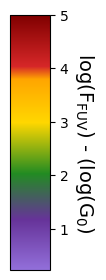

In [29]:
FUVfunctions.plotCmapFUV()

In this example, I am looking at the effect of three massive stars with 80, 26 and 10M $_\odot$ to their surroundings. 

In [24]:
mass = [80, 26, 10]

In [20]:
def IncidentFlux(mass, dist=500., 
                 #range for the coordinate grid                 
                 RA_ref=[-0.8, 0.8], DE_ref=[-0.8, 0.8]
                ):
    try:
        len(mass)
    except TypeError:
        mass = np.array([mass])
    else:
        mass = np.array(mass)

    #position of massive stars
    RA=np.full(len(mass), 0.)#data['ra']
    DE=np.full(len(mass), 0.)#data['dec']

    step_RA = (max(RA_ref) - min(RA_ref))/50
    step_DE = (max(DE_ref) - min(DE_ref))/50
    RA_bin = np.arange(min(RA_ref), max(RA_ref) + step_RA,step_RA).tolist()
    DE_bin = np.arange(min(DE_ref), max(DE_ref) + step_DE,step_DE).tolist()
    coord = CoordGrid(RA_bin, DE_bin, RA, DE, dist) #for the UV map
    
    #coordinate grid for massive star plots
    flux_coord = np.empty((len(RA), len(DE_bin), len(RA_bin)))
    print(len(RA))
    for i, m in enumerate(mass):
        for n in range(len(DE_bin)):
            for j in range(len(RA_bin)):
                flux_coord[i][n][j] = FUVfunctions.Parravano(m).localFUV(coord[i][n][j]).value
    return RA_bin,DE_bin,flux_coord,coord,step_RA,step_DE


In [21]:
def CoordGrid(RA_bin, DE_bin, RA, DE, dist):
    coord = np.empty((len(RA), len(DE_bin), len(RA_bin)))
    RA_dif = np.empty((len(RA), len(RA_bin)))
    DE_dif = np.empty((len(DE), len(DE_bin)))
    for i in range(len(RA)):
        for n in range(len(RA_bin)):
            RA_dif[i][n] = RA[i] - RA_bin[n]
        for m in range(len(DE_bin)):
            DE_dif[i][m] = DE[i] - DE_bin[m]
        for n in range(len(DE_bin)):
            for m in range(len(RA_bin)):
                coord[i][n][m] = np.sqrt(RA_dif[i][m]**2 + DE_dif[i][n]**2)
                coord[i][n][m] = np.tan(np.radians(coord[i][n][m]/2))*dist*2
    return coord

In [25]:
#position of massive stars
RA = np.full(len(mass), 0.)#data['ra']
DE = np.full(len(mass), 0.)#data['dec']
dist = 500.

#range for the coordinate grid
RA_ref = [-0.8, 0.8]
DE_ref = [-0.8, 0.8]

step_RA = (max(RA_ref) - min(RA_ref))/50
step_DE = (max(DE_ref) - min(DE_ref))/50
RA_bin = np.arange(min(RA_ref), max(RA_ref) + step_RA, step_RA).tolist()
DE_bin = np.arange(min(DE_ref), max(DE_ref) + step_DE, step_DE).tolist()
coord = CoordGrid(RA_bin, DE_bin, RA, DE, dist) #for the UV map


In [26]:
RA_bin,DE_bin,flux_coord,coord,step_RA,step_DE=IncidentFlux(mass)

3


In [27]:
for i in range(len(RA_bin)): #so that ticks lie in the centre of each data pixel
    RA_bin[i]=RA_bin[i]-(step_RA/2)
for i in range(len(DE_bin)):
    DE_bin[i]=DE_bin[i]-(step_DE/2)
x=RA_bin
y=DE_bin

The plot below shows the influence of three massive stars considered to their FUV environment. The y- and x-axis are distances both in parsec (left and bottom) and in terms of sky coordinates (Right and top), the latter considering stars at a distance of 500 pc. Colours follow the same colour-map used in the paper, shown at the top of the plot and presented in terms of $\log(F_\mathrm{FUV})$. The dashed circle and the bar show the distance from each massive star at which they increase their FUV-environment by 1,000 G$_0$.

<ipython-input-28-5d66b5cf4d2d>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc= ax.pcolor(x, y, z, cmap=cmap, norm=norm)


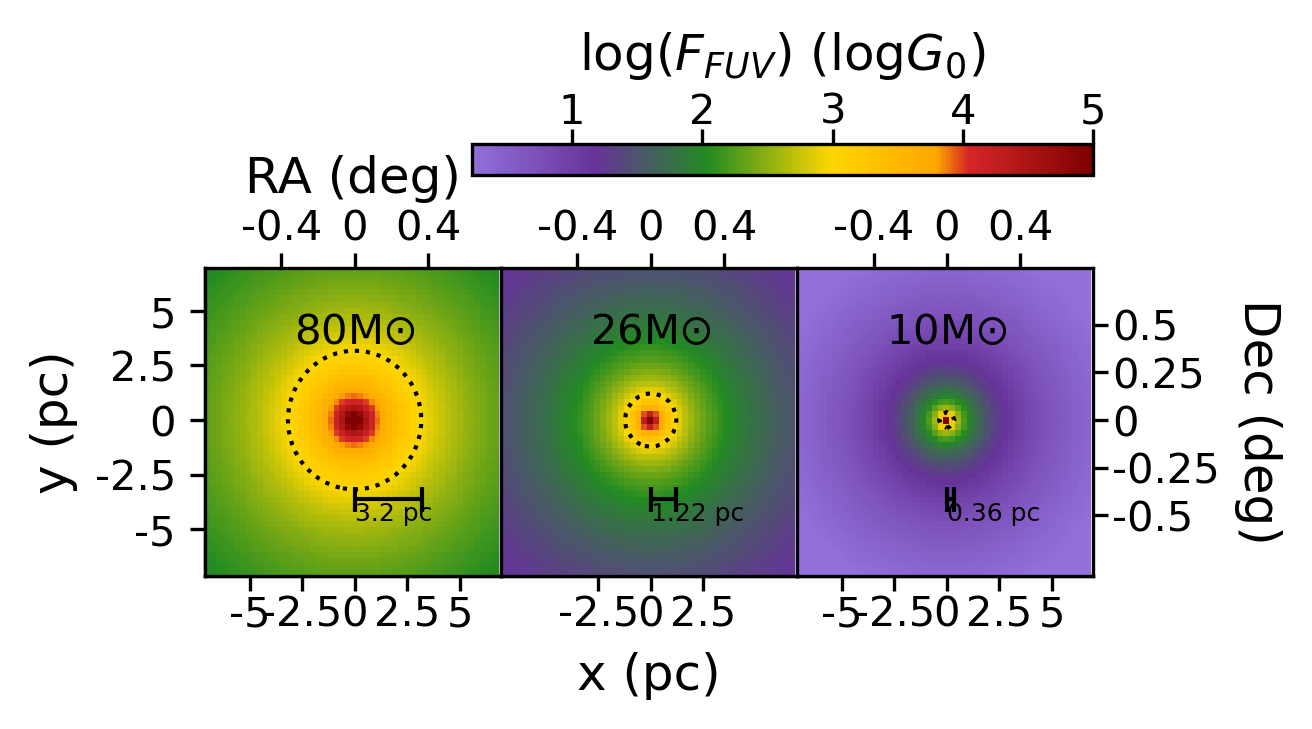

In [28]:
dim = (14,30)
name = 'PaperI'
#cmap=plt.cm.get_cmap(name, 100)
cmap = FUVfunctions.cmapFUV
norm = FUVfunctions.normFUV
fs=12
fuv1000 = [3.2, 1.22, 0.36]
#
fig = plt.subplots(figsize=(4.2,2.3), dpi=300)
plt.subplots_adjust(left=0.14, right=0.845, bottom=0.175, top=0.8)
plt.subplots_adjust(wspace=0, hspace=0)
axes_list = [(4, 0), (4, 10), (4, 20)]
axes = [plt.subplot2grid(dim,axes_list[0], colspan=10, rowspan=10)]
for i in range(2): 
    axes.append(plt.subplot2grid(dim, axes_list[i + 1], colspan=10, 
                                 rowspan=10, sharex=axes[0], 
                                 sharey=axes[0]))
#
def deg2pc(deg, d=500):
    return d*np.pi*deg/180.
def pc2deg(pc, d=500):
    return 180*pc/(d*np.pi)
#

for i in range(3):
    ax = axes[i]
    ax.yaxis.tick_right()
    z = np.log10(flux_coord[i]) 
    pc= ax.pcolor(x, y, z, cmap=cmap, norm=norm)
    levels = np.log10([1000])

    ax.annotate(r'{0}M$\odot$'.format(str(int(mass[i]))), (0,.4), ha='center')
    contour = ax.contour(z, levels, origin='lower', linewidths=1, colors='k', 
                         linestyles='dotted', extent=(min(x), max(x) + 
                                            step_RA, min(y), max(y) + step_DE))
    G_0 = [100]
    fmt = {}
    string = "G$_{0}$"
    strs = ["{}{}".format(i, string) for i in G_0]
    ax.errorbar(0, pc2deg(-3.6), xerr=np.array([[0, pc2deg(fuv1000[i])]]).T, 
                color='k', markersize=0, capsize=3, linewidth=1)
    ax.text(0, pc2deg(-4.6), '{0} pc'.format(fuv1000[i]), color='k', 
            fontsize=fs - 6)
    ax.tick_params(axis='both', which='major', pad=1)    


ax_cb = plt.subplot2grid(dim, (0, 9), colspan=21, rowspan=1)
cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm, 
                               orientation="horizontal", 
                               ticks=[1, 2, 3, 4, 5])  
cb.ax.set_xlabel(r'$\log(F_{FUV})$ ($\log G_0$)', rotation=0, linespacing=5, 
                 fontsize=fs, labelpad=-35)    
ax_cb.xaxis.set_ticks_position('top')
cb.ax.set_xticklabels([1, 2, 3, 4, 5])
cb.ax.xaxis.set_tick_params(pad=-0.5)
 
for i in [2]:
    ax = axes[i]
    ax.yaxis.tick_right()
    ax.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_yticklabels([-0.5, -0.25, 0, 0.25, 0.5], fontsize=fs-2)
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('Dec (deg)', fontsize=fs, rotation=-90, labelpad=15)

for i in [0]:
    ax = axes[i]
    plt.setp(ax.get_yticklabels(), visible=False)
    ax2 = ax.secondary_yaxis("left", functions=(deg2pc, pc2deg))
    ax2.set_ylabel('y (pc)', fontsize=fs)
    ax2.set_yticks([-5, -2.5, 0, 2.5, 5])
    ax2.set_yticklabels([-5, -2.5, 0, 2.5, 5], fontsize=fs - 2, rotation=0)      

for i in [0, 1, 2]:
    ax = axes[i]
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")
    if i == 0:
        ax.set_xlabel('RA (deg)', fontsize=fs)    
    ax.set_xticks([-0.4, 0, 0.4])
    ax.set_xticklabels([-0.4, 0, 0.4],fontsize=fs-2)

for i in [0, 1, 2]:  
    ax = axes[i]
    ax2 = ax.secondary_xaxis("bottom", functions=(deg2pc,pc2deg))
    ax2.tick_params(axis='both', which='major', pad=1)        
    if i == 1: 
        ax2.set_xlabel('x (pc)', fontsize=fs)
        ax2.set_xticks([-2.5, 0,2.5])
        ax2.set_xticklabels([-2.5, 0, 2.5], fontsize=fs-2)      
    else:
        ax2.set_xticks([-5, -2.5, 0, 2.5, 5])
        ax2.set_xticklabels([-5, -2.5, 0, 2.5, 5], fontsize=fs-2)      

# plt.savefig('/Users/jroquette/work/plot/UVmap_MassiveStars_theoretical_'+name+'updated_12May21.png')